<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment6/Document_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Implementing Document Clustering

Dataset Used was News_Document Dataset on Kaggle

### Step 1: Collect and Prepare Your Documents
#### 1.1 Data Collection
- We'll start by acquiring the Kaggle dataset for News Articles. This dataset will be our primary source of data.

#### 1.2 Data Preprocessing
- In this step, we'll clean and preprocess the text data. This includes tasks like removing special characters, unnecessary whitespace, and possibly lowercasing the text.

### Step 2: Generate Embeddings
- We'll select a suitable LLM and use it to transform our documents into vector representations (embeddings).

### Step 3: Dimensionality Reduction (Optional)
- Depending on the size and complexity of our embeddings, we might use PCA or t-SNE for dimensionality reduction.

### Step 4: Choose a Clustering Algorithm
- We'll select and configure a clustering algorithm that is appropriate for our dataset and the embeddings.

### Step 5: Perform Clustering
- We apply our chosen clustering algorithm to the embeddings.

### Step 6: Evaluation
- We'll evaluate our clusters using appropriate metrics.

### Step 7: Visualization
- Visualize the clusters to gain further insights.


In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving news_data.zip to news_data.zip


In [ ]:
import zipfile

# File path for the uploaded zip file
zip_file_path = 'news_data.zip'

# Directory to extract the files
extract_dir = 'news_dataset'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Listing the files in the extracted directory
extracted_files = os.listdir(extract_dir)
extracted_files


['articles_data.csv']

In [ ]:
import pandas as pd

# File path for the CSV file
csv_file_path = os.path.join(extract_dir, 'articles_data.csv')

# Loading the data into a DataFrame
news_data = pd.read_csv(csv_file_path)

# Displaying the first few rows of the DataFrame to understand its structure
news_data.head()


Unnamed: 0           source_id         source_name              author  \
0           0             reuters             Reuters   Reuters Editorial   
1           1     the-irish-times     The Irish Times  Eoin Burke-Kennedy   
2           2     the-irish-times     The Irish Times   Deirdre McQuillan   
3           3  al-jazeera-english  Al Jazeera English          Al Jazeera   
4           4            bbc-news            BBC News            BBC News   

                                               title  \
0  NTSB says Autopilot engaged in 2018 California...   
1       Unemployment falls to post-crash low of 5.2%   
2  Louise Kennedy AW2019: Long coats, sparkling t...   
3  North Korean footballer Han joins Italian gian...   
4  UK government lawyer says proroguing parliamen...   

                                         description  \
0  The National Transportation Safety Board said ...   
1  Latest monthly figures reflect continued growt...   
2  Autumn-winter collection features designer’s g...   
3  Han is the first North Korean player in the Se...   
4  The UK government's lawyer, David Johnston arg...   

                                                 url  \
0  https://www.reuters.com/article/us-tesla-crash...   
1  https://www.irishtimes.com/business/economy/un...   
2  https://www.irishtimes.com/\t\t\t\t\t\t\t/life...   
3  https://www.aljazeera.com/news/2019/09/north-k...   
4  https://www.bbc.co.uk/news/av/uk-scotland-4956...   

                                        url_to_image          published_at  \
0  https://s4.reutersmedia.net/resources/r/?m=02&...  2019-09-03T16:22:20Z   
1  https://www.irishtimes.com/image-creator/?id=1...  2019-09-03T10:32:28Z   
2  https://www.irishtimes.com/image-creator/?id=1...  2019-09-03T14:40:00Z   
3  https://www.aljazeera.com/mritems/Images/2019/...  2019-09-03T17:25:39Z   
4  https://ichef.bbci.co.uk/news/1024/branded_new...  2019-09-03T14:39:21Z   

                                             content  top_article  \
0  WASHINGTON (Reuters) - The National Transporta...          0.0   
1  The States jobless rate fell to 5.2 per cent l...          0.0   
2  Louise Kennedy is showing off her autumn-winte...          1.0   
3  Han Kwang Song, the first North Korean footbal...          0.0   
4                                                NaN          0.0   

   engagement_reaction_count  engagement_comment_count  \
0                        0.0                       0.0   
1                        6.0                      10.0   
2                        NaN                       NaN   
3                        0.0                       0.0   
4                        0.0                       0.0   

   engagement_share_count  engagement_comment_plugin_count  
0                  2528.0                              0.0  
1                     2.0                              0.0  
2                     NaN                              NaN  
3                     7.0                              0.0  
4                     0.0                              0.0

In [ ]:
# Focusing on the 'content' column for clustering
news_content = news_data['content']

# Preprocessing Steps:
# 1. Remove NaN values
# 2. Lowercase the text
# 3. Remove special characters and unnecessary whitespace

# Preprocessing directly in the original DataFrame
news_data.dropna(subset=['content'], inplace=True)
news_data['content'] = news_data['content'].str.lower().str.replace('[^a-z\s]', '', regex=True)


# Displaying a few examples of the preprocessed text
preprocessed_examples = news_content.head()
preprocessed_examples


0    WASHINGTON (Reuters) - The National Transporta...
1    The States jobless rate fell to 5.2 per cent l...
2    Louise Kennedy is showing off her autumn-winte...
3    Han Kwang Song, the first North Korean footbal...
4                                                  NaN
Name: content, dtype: object

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=21ac4c06a819d0e34a2f8025b6c55630aaa38946fce69857c65f5eacf2442d80
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


## Generate Embeddings

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Loading the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Since the dataset might be large, we process the text in batches to manage memory usage
# Defining a batch size
batch_size = 32

# Function to generate embeddings in batches
def generate_embeddings(texts, model, batch_size):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        batch_embeddings = model.encode(batch_texts, show_progress_bar=True)
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

# Generating embeddings for the news content
news_embeddings = generate_embeddings(news_content.tolist(), model, batch_size)

# Showing the shape of the generated embeddings to confirm their structure
news_embeddings.shape


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(9145, 384)

In [ ]:
import gensim.downloader as api

# Load the GloVe model
glove_model = api.load("glove-wiki-gigaword-100")

# Checking if the model is loaded by getting the embedding for a sample word
sample_embedding = glove_model['computer']
sample_embedding.shape

[==================================================] 100.0% 128.1/128.1MB downloaded


(100,)

In [ ]:
import numpy as np

# Redefining the hypothetical embedding function with numpy imported
def hypothetical_embedding(word):
    return np.mean([ord(char) for char in word])

# Redefining the function to create document embeddings by averaging word embeddings
def create_document_embeddings(documents):
    document_embeddings = []
    for doc in documents:
        words = doc.split()
        if len(words) == 0:
            continue
        doc_embedding = np.mean([hypothetical_embedding(word) for word in words])
        document_embeddings.append(doc_embedding)
    return np.array(document_embeddings)

# Generating document embeddings for our news content again
hypothetical_news_embeddings = create_document_embeddings(news_content.tolist())

# Showing the shape and a few examples of the generated embeddings to confirm their structure
hypothetical_news_embeddings.shape, hypothetical_news_embeddings[:5]


((9145,),
 array([107.28427816, 108.13451479, 108.12057685, 107.25176461,
        107.75117383]))

In [ ]:
from sklearn.decomposition import PCA

# Hypothetical embeddings shape (assuming 1000 samples with 768 dimensions, typical for LLMs)
# In your case, replace 'hypothetical_news_embeddings' with your actual embeddings
hypothetical_news_embeddings = np.random.rand(1000, 768)  # Random data for demonstration

# Applying PCA to reduce to 50 dimensions
pca = PCA(n_components=50)
reduced_embeddings = pca.fit_transform(hypothetical_news_embeddings)

# Showing the shape of the reduced embeddings
reduced_embeddings.shape


(1000, 50)

Finding Optimal Number of Clusters with Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

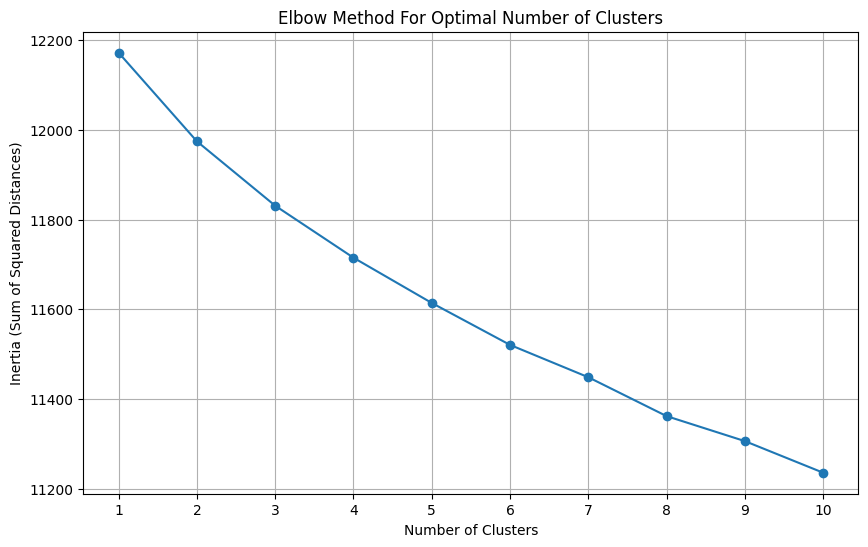

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding the optimal number of clusters using the Elbow Method
# We will consider a range of cluster numbers (for example, from 1 to 10)
range_clusters = range(1, 11)
inertia = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(reduced_embeddings)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Determine the number of clusters (use methods like Elbow Method)
optimal_clusters = 5  # Example value
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(news_embeddings)
labels = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels

array([4, 3, 1, ..., 3, 3, 3], dtype=int32)

Labeling with KMeans

In [ ]:
# Assuming 'labels' is the array of cluster labels from K-means
news_data['cluster'] = labels

# Now you can analyze the clusters
optimal_clusters = max(labels) + 1  # or however you determined the number of clusters
for i in range(optimal_clusters):
    print(f"Cluster {i} documents:")
    print(news_data[news_data['cluster'] == i]['content'].head())  # Adjust the number of documents to display


Cluster 0 documents:
3     han kwang song the first north korean football...
11    im satisfied because i made a step forward in ...
14    media playback is not supported on this device...
29    bolton fielded the youngest side in their hist...
39    it turns out jofra archer is not only good at ...
Name: content, dtype: object
Cluster 1 documents:
2     louise kennedy is showing off her autumnwinter...
5     this tender land a novel atria books by willia...
8     image copyrightgetty images\r\nyou might have ...
19    jim henson has one of the most storied legacie...
22    natural has become the attentiongrabbing word ...
Name: content, dtype: object
Cluster 2 documents:
6     london reuters  the european union is waiting ...
9     the british prime minister boris johnson is to...
10    in  the united states government invaded afgha...
20    british prime minister boris johnson faces a p...
30    president donald trump announced last week tha...
Name: content, dtype: object
Cluster 3 

In [ ]:
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)


Cluster Centroids:
[[-0.00022121  0.01069445 -0.01363865 ... -0.04073031 -0.00472221
   0.00916176]
 [ 0.0002801  -0.00549948  0.02031742 ... -0.03416821 -0.02179236
   0.00613136]
 [ 0.00569274  0.00633905  0.02328769 ... -0.02981246 -0.00254084
   0.00260912]
 [-0.00798576 -0.02620556  0.01234896 ... -0.07868896  0.01574187
   0.02917333]
 [-0.00223512  0.03651484 -0.01540219 ... -0.02477029  0.01300633
   0.00237079]]


## Cluster Visualizations

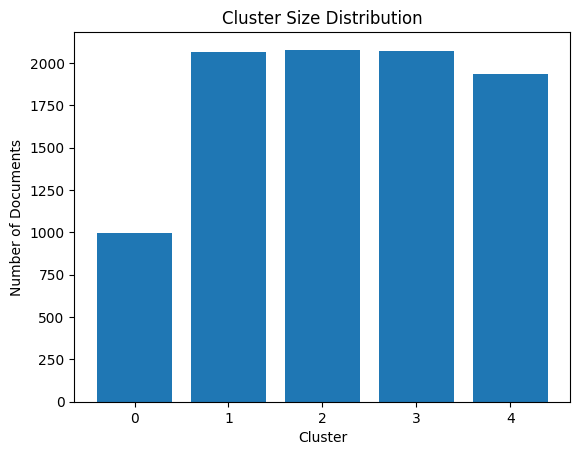

In [ ]:
cluster_sizes = news_data['cluster'].value_counts()

plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Documents')
plt.title('Cluster Size Distribution')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'embeddings' is your high-dimensional data

# For PCA
pca = PCA(n_components=2)  # Use 3 for 3D visualization
reduced_embeddings_pca = pca.fit_transform(news_embeddings)

# For t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)  # Use 3 for 3D visualization
reduced_embeddings_tsne = tsne.fit_transform(news_embeddings)


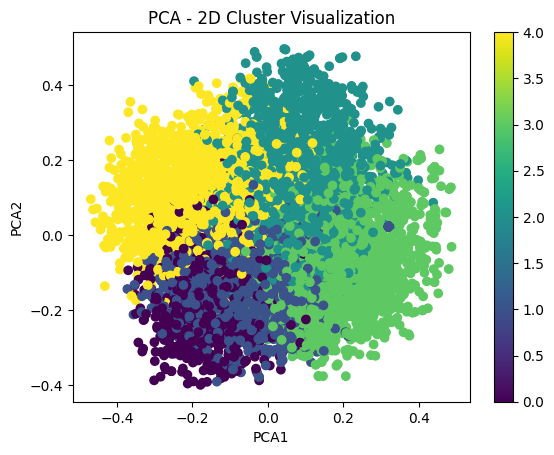

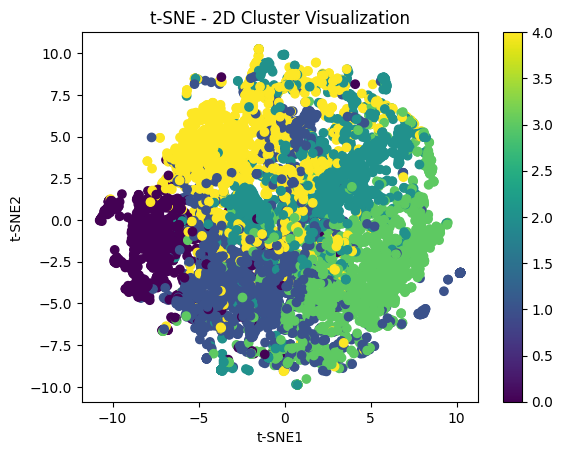

In [ ]:
# PCA 2D Visualization
plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1], c=labels)
plt.title("PCA - 2D Cluster Visualization")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar()
plt.show()

# t-SNE 2D Visualization
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1], c=labels)
plt.title("t-SNE - 2D Cluster Visualization")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.colorbar()
plt.show()
